In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn
from matplotlib import pyplot as plt

In [94]:
df=pd.read_csv('Data_ML.csv')

In [95]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [96]:
df.shape

(7, 2)

In [97]:
df.tail()

,Weight,Price
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


Text(0.5, 1.0, 'Weight vs Price')

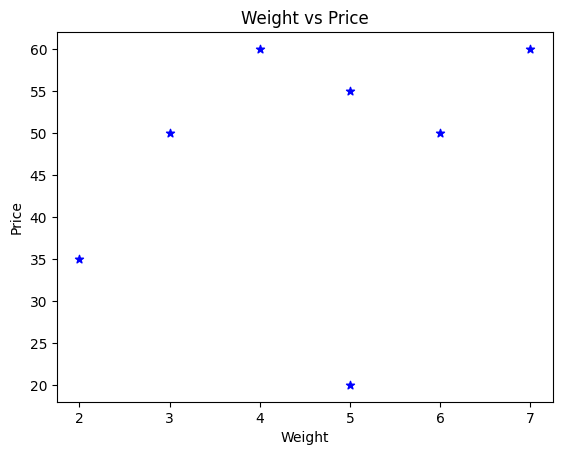

In [98]:
plt.scatter(df['Weight'],df['Price'], color='blue', marker='*')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price')

In [99]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [101]:
x=np.array(df['Weight'])
y=np.array(df['Price'])

In [102]:
x

array([2, 4, 5, 3, 6, 5, 7])

In [103]:
y

array([35, 60, 20, 50, 50, 55, 60])

In [47]:
df.head()

,Weight,Price
0,2.0,35.0
1,4.0,60.0
2,5.0,20.0
3,3.0,50.0
4,6.0,50.0


In [122]:
x=df['Weight']
y=df['Price']
mean_x=np.mean(x)
mean_y=np.mean(y)

In [123]:
mean_x

np.float64(4.571428571428571)

In [124]:
mean_y

np.float64(47.142857142857146)

In [125]:
dev_x=x-mean_x
dev_y=y-mean_y

In [126]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [127]:
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

In [66]:
df.describe()

,Weight,Price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


Text(0.5, 1.0, 'Weight vs Price')

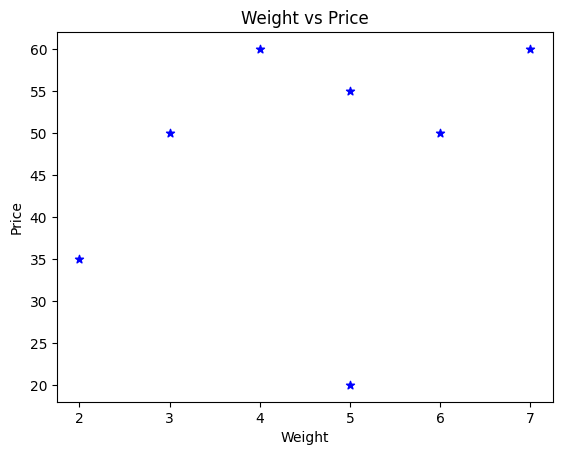

In [71]:
plt.scatter(df['Weight'],df['Price'], color='blue', marker='*')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price')

LR with Formula

In [128]:
#y=mx+c
m=np.sum(dev_x * dev_y)/np.sum(dev_x**2)
c=mean_y-m*mean_x 
print(f'the value of m={m}')
print(f'the value of c={c}')

the value of m=2.620967741935484
the value of c=35.16129032258065


In [130]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [131]:
predicted_y=m*2+c #predicted value of price(y) against the original value of weight (x) which is 2 here
print(predicted_y)

40.403225806451616


In [157]:
#predicted value of price(y) against the original value of weight (x) which is 6.5 here
predicted_y=m*6.5+c
print(predicted_y)

52.197580645161295


Text(0.5, 1.0, 'Weight vs Price')

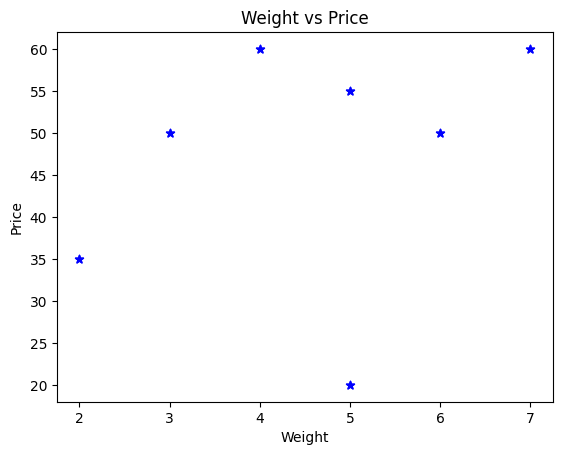

In [84]:
plt.scatter(df['Weight'],df['Price'], color='blue', marker='*')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price')

#Linear regression with sklearn

In [90]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [133]:
reg.fit(df[['Weight']],df['Price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [134]:
reg.predict([[2]]) 
#this is also same as previous predicted value of y for x=2

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.40322581])

In [159]:
#The predicted value of price(y) for the feature input value of weight (x) 6.5
reg.predict([[6.5]])

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.19758065])

In [118]:
reg.score(df[['Weight']],df['Price'])

0.09412315095348434

In [120]:
reg.coef_ #this is the equivalent of slope 'm' in the y=mx+c

array([2.62096774])

In [135]:
reg.intercept_  #this is the equivalent of constant 'c' in the y=mx+c

np.float64(35.16129032258065)

In [136]:
reg.coef_*2+reg.intercept_ 
#This is same as y=mx+c and the predicted value is same for 2 

array([40.40322581])

In [158]:
#The predicted value of price(y) for the feature input value of weight (x) 6.5
reg.coef_*6.5+reg.intercept_ 

array([52.19758065])

Text(0.5, 1.0, 'Weight vs Price')

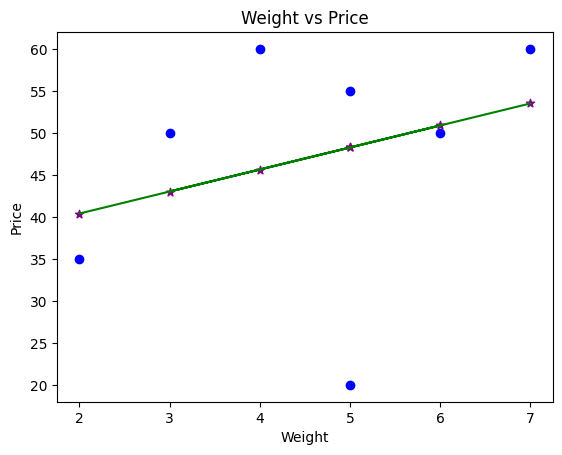

In [145]:
plt.scatter(df['Weight'],df['Price'], color='blue', marker='o')

plt.plot(df[['Weight']],reg.predict(df[['Weight']]), color='green') #this is code for best fit line

plt.scatter(df['Weight'],reg.predict(df[['Weight']]), color='purple', marker='*')

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price')

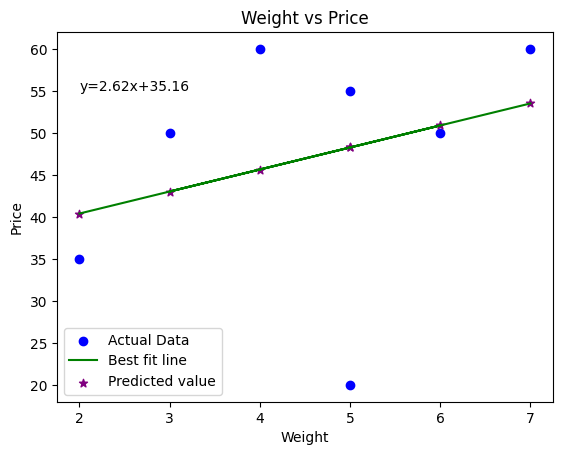

In [156]:
m=reg.coef_[0]
c=reg.intercept_

equ=f'y={float(m):.2f}x+{float(c):.2f}'
plt.text(min(x),max(y)-5, equ, color='black')

plt.scatter(df['Weight'],df['Price'], color='blue', marker='o', label='Actual Data')

plt.plot(df[['Weight']],reg.predict(df[['Weight']]), color='green', label='Best fit line') #this is code for best fit line

plt.scatter(df['Weight'],reg.predict(df[['Weight']]), color='purple', marker='*', label='Predicted value')

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price')

plt.legend()
plt.show()